In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data=pd.read_csv('drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Initial data exploration

### catogorical variables

In [6]:
data.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [7]:
data.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [8]:
data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [9]:
data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

## Numerical variables

In [10]:
skewAge=data.Age.skew(axis=0,skipna=True)
print("Age skewness :",skewAge)

Age skewness : 0.03030835703000607


In [11]:
skewNatoK=data.Na_to_K.skew(axis=0,skipna=True)
print("Na to k skewness :",skewNatoK)

Na to k skewness : 1.039341186028881


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

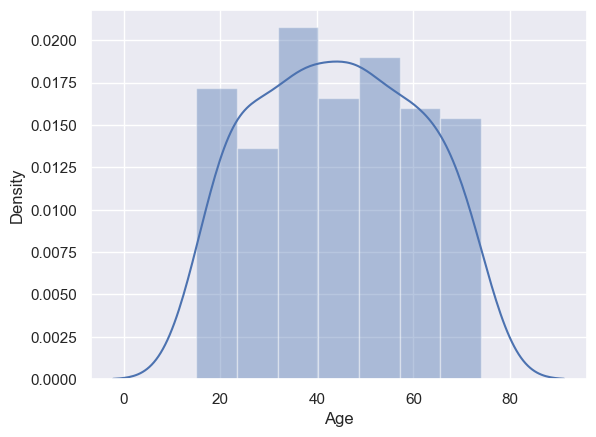

In [12]:
sns.distplot(data['Age'])
#here no skewness  symmetric

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

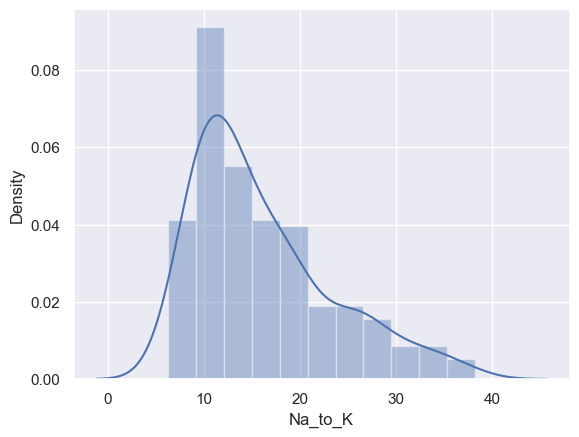

In [13]:
sns.distplot(data['Na_to_K'])

## EDA

#### Drug type distribution

<AxesSubplot:xlabel='count', ylabel='Drug'>

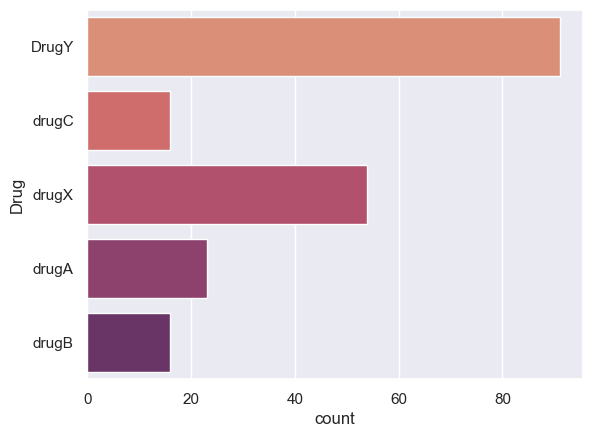

In [14]:
sns.set_theme(style='darkgrid')
sns.countplot(y='Drug',data=data,palette='flare')

## Gender distribution

<AxesSubplot:xlabel='Sex', ylabel='count'>

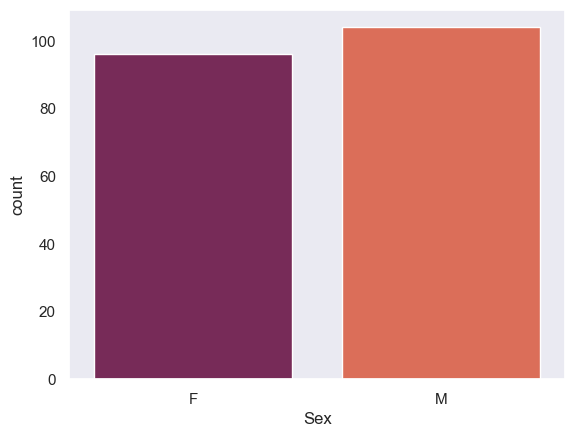

In [15]:
sns.set_theme(style="dark")
sns.countplot(data=data,x='Sex',palette='rocket')

### Blood pressure distribution

<AxesSubplot:xlabel='BP', ylabel='count'>

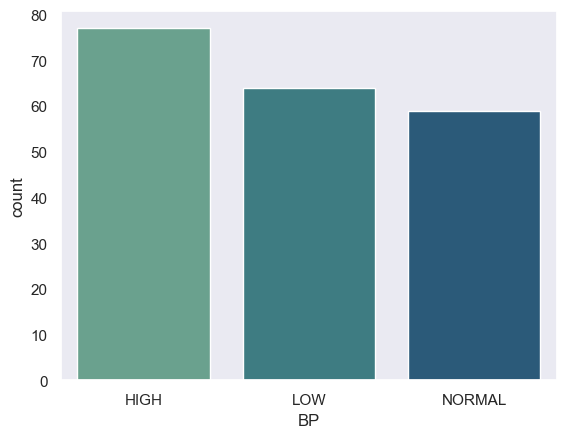

In [16]:
sns.countplot(data=data,x='BP',palette='crest')

### Cholesterol Distribution

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

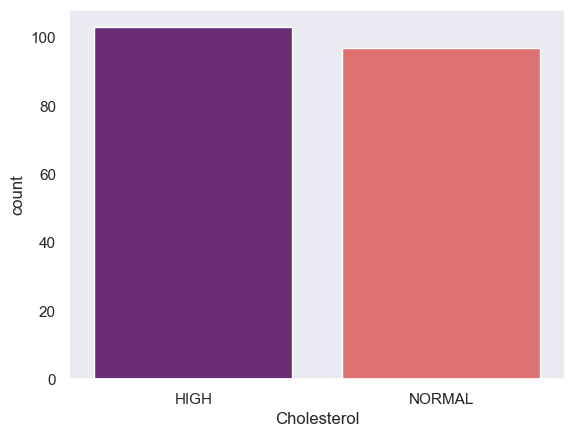

In [17]:
sns.countplot(data=data,x='Cholesterol',palette='magma')

### Gender distriution based on drug type

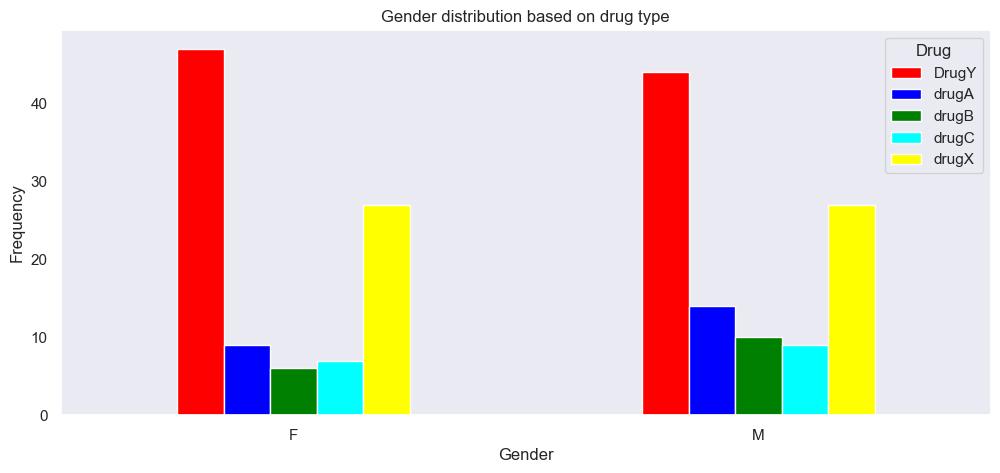

In [18]:
pd.crosstab(data.Sex,data.Drug).plot(kind='bar',figsize=(12,5),color=['red','blue','green','cyan','yellow'])
plt.title('Gender distribution based on drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

#### Blood pressure dist based on cholesterol

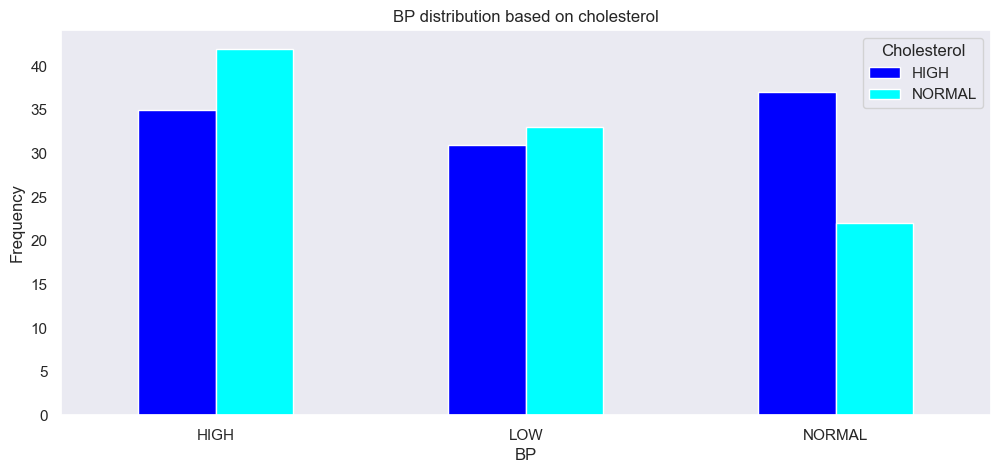

In [19]:
pd.crosstab(data.BP,data.Cholesterol).plot(kind='bar',figsize=(12,5),color=['blue','cyan'])
plt.title('BP distribution based on cholesterol')
plt.xlabel('BP')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

##### Sodium to pottassium distribution based on gender and age

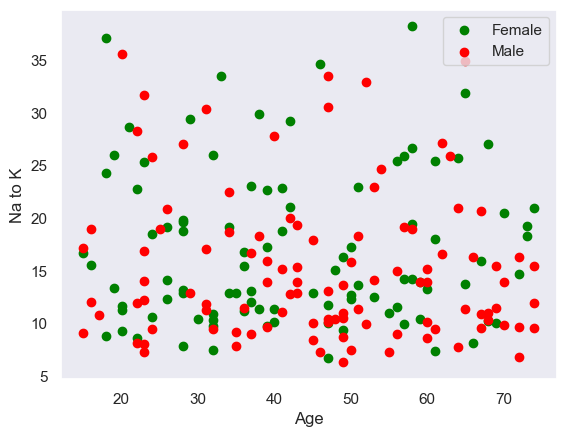

In [20]:
plt.scatter(x=data.Age[data.Sex=='F'],y=data.Na_to_K[data.Sex=='F'],c='green')
plt.scatter(x=data.Age[data.Sex=='M'],y=data.Na_to_K[data.Sex=='M'],c='red')
plt.legend(['Female','Male'])
plt.xlabel('Age')
plt.ylabel('Na to K')
plt.show()

## Data set Preparation

### Data binning

In [21]:
data.Age.max()

74

In [22]:
bin_age=[0,19,29,39,49,59,69,80]
category_age=['<20s','20s','30s','40s','50s','60s','>60s']
data['Age_binned']=pd.cut(data ['Age'],bins=bin_age,labels=category_age)
data=data.drop (['Age'],axis=1)
data

,Sex,BP,Cholesterol,Na_to_K,Drug,Age_binned
0,F,HIGH,HIGH,25.355,DrugY,20s
1,M,LOW,HIGH,13.093,drugC,40s
2,M,LOW,HIGH,10.114,drugC,40s
3,F,NORMAL,HIGH,7.798,drugX,20s
4,F,LOW,HIGH,18.043,DrugY,60s
...,...,...,...,...,...,...
195,F,LOW,HIGH,11.567,drugC,50s
196,M,LOW,HIGH,12.006,drugC,<20s
197,M,NORMAL,HIGH,9.894,drugX,50s
198,M,NORMAL,NORMAL,14.020,drugX,20s


In [23]:
bin_NatoK=[0,9,19,29,50]
category_NatoK=['<10','10-20','20-30','>30']
data['Na_to_K_binned']=pd.cut(data ['Na_to_K'],bins=bin_NatoK,labels=category_NatoK)
data=data.drop (['Na_to_K'],axis=1)
data

,Sex,BP,Cholesterol,Drug,Age_binned,Na_to_K_binned
0,F,HIGH,HIGH,DrugY,20s,20-30
1,M,LOW,HIGH,drugC,40s,10-20
2,M,LOW,HIGH,drugC,40s,10-20
3,F,NORMAL,HIGH,drugX,20s,<10
4,F,LOW,HIGH,DrugY,60s,10-20
...,...,...,...,...,...,...
195,F,LOW,HIGH,drugC,50s,10-20
196,M,LOW,HIGH,drugC,<20s,10-20
197,M,NORMAL,HIGH,drugX,50s,10-20
198,M,NORMAL,NORMAL,drugX,20s,10-20


## Splitting the dataset

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
x=data.drop(['Drug'],axis=1)
y=data.Drug

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### Feature Enginearing

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
encoder=OneHotEncoder()

In [29]:
x_train=pd.DataFrame(encoder.fit_transform(x_train).toarray())
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [30]:
x_test=pd.DataFrame(encoder.fit_transform(x_test).toarray())
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## SMOTE Technique

In [31]:
# from imblearn.over_sampling import SMOTE
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report

# # Create a binary classification dataset with a 2:1 class distribution
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# # Initialize SMOTE
# smote = SMOTE(random_state=42)

# # Fit SMOTE to the training data
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # Train a logistic regression model on the SMOTE-transformed training data
# model = LogisticRegression(solver='lbfgs')
# model.fit(X_train_smote, y_train_smote)

# # Use the trained model to make predictions on the test data
# y_pred = model.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred))


In [33]:
# !pip uninstall scikit-learn-y

In [42]:
!pip install scikit-learn

In [40]:
# !pip3 install scikit-learn

^C


In [37]:
from importlib import reload
sklearn = reload(sklearn)


NameError: name 'sklearn' is not defined

In [38]:
# !pip install --upgrade imbalanced-learn


     -------------------------------------- 235.6/235.6 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [43]:
from imblearn.over_sampling import SMOTE
x_train,y_train=SMOTE().fit_resample(x_train,y_train)

ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\user\anaconda3\lib\site-packages\imblearn\utils\_validation.py)

In [ ]:
sns.countplot(y=y_train,data=data,palette='mako_r')
plt.ylabel('Drug type')
plt.xlabel('Total')
plt.show()

## Models

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear',max_iter=5000)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

print(classification_report(y_test,y_pred))
print('next')
print(confusion_matrix(y_test,y_pred))


In [ ]:
from sklearn.metrics import accuracy_score
LRacc=accuracy_score(y_pred,y_test)
print('Logistic regression accuracy is: {:.2f}%'.format(LRacc*100))

## K Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier=KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(x_train,y_train)

y_pred=KNclassifier.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score
KNacc=accuracy_score(y_pred,y_test)
print('KNeighbour accuracy score :{:.2f}%'.format(KNacc*100))

In [ ]:
scorelistknn=[]
for i in range(1,30):
    KNclassifier=KNeighborsClassifier(n_neighbors=i)
    KNclassifier.fit(x_train,y_train)
    scorelistknn.append(KNclassifier.score(x_test,y_test))
    
plt.plot(range(1,30),scorelistknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.show()
KNaccMax=max(scorelistknn)
print('KNN acc max {:.2f}%'.format(KNaccMax*100) )
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

## Naive bayes

### Categorical NB

In [ ]:
from sklearn.naive_bayes import CategoricalNB
nb=CategoricalNB()
nb.fit(x_train,y_train)

y_pred=nb.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score
CNBacc=accuracy_score(y_pred,y_test)
print('Naive bayes accuracy score :{:.2f}%'.format(CNBacc*100))

## Gausiian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

y_pred=gnb.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score
GNBacc=accuracy_score(y_pred,y_test)
print('Gaussian naive bayes accuracy score :{:.2f}%'.format(GNBacc*100))

## Support vector machine SVM

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',max_iter=251)
svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score
SVCacc=accuracy_score(y_pred,y_test)
print('KNeighbour accuracy score :{:.2f}%'.format(SVCacc*100))

### Model comparison

In [ ]:
compare=pd.DataFrame({'model':['Logistic regression','Kneighbours','Kneighbours max','SVM','Categorical NB','Gaussian NB'],
                     'Accuracy':[LRacc*100,KNacc*100,KNaccMax*100,SVCacc*100,CNBacc*100,GNBacc*100]})
compare.sort_values(by='Accuracy',ascending=False)

In [ ]:
import pickle
import joblib

In [ ]:
joblib.dump(lr,open('finalModel.pkl','wb'))

In [ ]:
joblib.dump(encoder,open('finalEncoder.pkl','wb'))

In [ ]:
model=joblib.load(open('finalModel.pkl','rb'))
model

In [ ]:
encoder=joblib.load(open('finalEncoder.pkl','rb'))
encoder

In [ ]:
x

In [ ]:
testset=np.array([['M','NORMAL','NORMAL','40s','>30']])
testset

In [ ]:
sc=enc.transform(testset)
sc

In [ ]:
model.predict(sc)